# HW Week 6 - Davis Club

---

Jeff Shamp, John Kellogg, Grace Han

---

From BB and the NetworkX documentation

This assignment takes a small dataset from a 1941 study of 10 Women at attendance to 14 social events.  We are tasked with finding and possibly inferring relationships between the women and the social groups/events.

In [56]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import warnings
from pyvis.network import Network

import sys
sys.path.append('../')
from utils_620 import *

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload

G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

# Omitting the biadjacent matrix for brevity
# print("Biadjacency matrix")
# print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


We see from the degrees of members and member meetings that all of the woman have about the same number of friends, as such this network isn't held together by a small number of "super-friends" with connections to the majority. The data is concerned with 18 women and most having around 15 friends. Almost all the women know or have some connection to all the other women. We also see that there is a gradient of number of meetings each member attends. We do have several women a large number of connections to others, this is likely due to the club they attend. We will visual this original 2-mode network and then the 1-mode projection. 

In [37]:
M = Network(height='800px',
            width='1000px',
            bgcolor='#222222', 
            font_color='white', 
            notebook=True)

M.barnes_hut()
for n in G.nodes():
    M.add_node(n)
for e in G.edges():
    M.add_edge(e[0], e[1])
M.show('network_2.html')

So it is clear that there are large and small clubs that serve has connectors between members. There are about four clubs that connect a large number of women and several smaller clubs that connect only a few new people to the larger network. 

In [38]:
C = Network(height='1000px',
            width='1000px',
            bgcolor='#222222', 
            font_color='white', 
            notebook=True)

C.barnes_hut()
for n in W.nodes():
    C.add_node(n)
for e in W.edges():
    C.add_edge(e[0], e[1])
C.show('network_2.html')

For the seven women in the middle of the network who have many (40 +) connections they attend at least one of the major clubs in addition to some smaller clubs. This makes gives them such a high weighted degree. 

If we take the same idea and add color to the weights, we can now see the key women in the middle of the network to have the high number of connections.

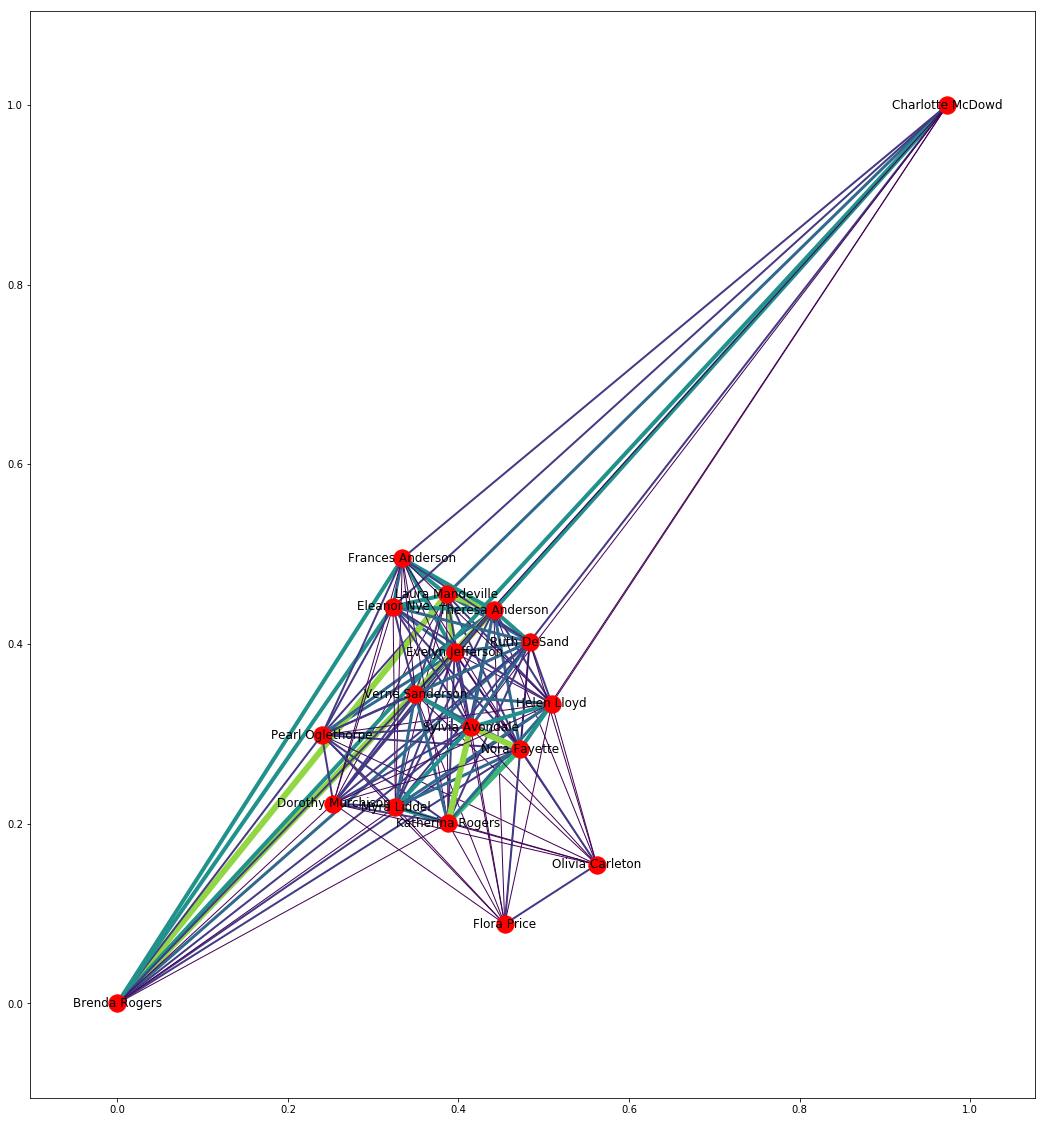

In [39]:
#e = bipartite.projected_graph(G, women)
e = bipartite.weighted_projected_graph(G, women)


e.edges(data=True)
weights=[edata['weight'] for f,t,edata in e.edges(data=True)]
plt.figure(figsize=(18,20))
nx.draw_networkx(e, width=weights, edge_color=weights)

Using all of these assessments, we can conclude the network is very centralized and closed.  There were a few events where ALL the women attended.  Some groups of the women attended every event while almost all of them attended a large majority of the events.  It would be safe to conclude, while some of these woman are not directly connected to another, the closeness of the network would lead a researcher to conclude they would at least have some knowledge of everyone.  

In [75]:
def _get_metric(metric_name, network):
    metric_dict = {
        "degree": nx.degree_centrality(network),
        "eigen": nx.eigenvector_centrality_numpy(network),
        "close": nx.closeness_centrality(network),
        "between": nx.betweenness_centrality(network)
    }
    return metric_dict[metric_name]

def make_centrality(network, metric_name):
    metric = _get_metric(metric_name, network)
    _sort=sorted(metric.items(),
          key=lambda x:x[1], 
          reverse=True)
    metric_df = pd.DataFrame(_sort, columns=['node',
                                             f"{metric_name}_central"])
    return metric_df

def make_merge(df_list):
    from functools import reduce
    df_final = reduce(
        lambda left,right: pd.merge(left,right,on='node',
                                    how="inner"),
        df_list
    )
    return df_final

In [76]:
metrics = ["degree", "eigen", "close"]
df_list = [make_centrality(e, metric) for metric in metrics]    

In [77]:
metric_df = make_merge(df_list)

In [81]:
metric_df.sort_values("eigen_central", ascending=False).head(10)

,node,degree_central,eigen_central,close_central
1,Theresa Anderson,1.000000,0.353554,1.000000
0,Evelyn Jefferson,1.000000,0.318520,1.000000
12,Brenda Rogers,0.882353,0.304244,0.894737
11,Laura Mandeville,0.882353,0.300407,0.894737
4,Sylvia Avondale,1.000000,0.272878,1.000000
5,Nora Fayette,1.000000,0.253274,1.000000
2,Ruth DeSand,1.000000,0.248510,1.000000
14,Eleanor Nye,0.882353,0.239037,0.894737
3,Verne Sanderson,1.000000,0.230700,1.000000
9,Katherina Rogers,0.941176,0.221975,0.944444


We see that from degree centrality, many of the women have a score of one so it will be necessary to understand their eigen centrality for comparison. In this light, Theresa Anderson is connected to well-connected women. In this view, she would be one of the most connected women in that her network encapsulates many other members. Brenda Rogers, who does not have a degree centrality of one, but does have a large eigen centrality is also highly connected to dense sub-networks of members. 

[Video Submission](!https://youtu.be/zfcaYs4KIHo).